#DSML investigation:
### You are part of the Suisse Impossible Mission Force, or SIMF for short. You need to uncover a rogue agent that is trying to steal sensitive information.

### Your mission, should you choose to accept it, is to find that agent before stealing any classified information. Good luck!


# Assignment part one

We have retrieved from the laptop of a spy agent some documents. Our intelligence shows that the person that we are looking for has visited countries X and Y, was in USA between Sept 2019 to Oct 2020. He is currently working undercover.


##Getting to know our data

We have retrieved from the laptop the following file:
- A list of suspects
- The flight records of these potential suspects



In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
userRecords = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/master/Assignements/Part%201/data/userRecords.csv")
travelRecords = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/master/Assignements/Part%201/data/flightRecords.csv")

#### Shape of the data

Let's first check how many rows and columns (features) are in the user records

In [127]:
r, c = userRecords.shape
print("rows = ", r)
print("columns = ", c)

rows =  957
columns =  10



#### Check out the first few rows
To protect innocent people, the name of the suspects have been censored, those will be revealed once number of potential suspects decreases.


In [128]:
userRecords.head()

,Unnamed: 0.1,Unnamed: 0,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
0,0,0,317991,Lu***,Al*****,29-07-2003,AR,1.0,2.0,Web Designer
1,1,1,241892,Ma****,Ro*******,10-11-1999,AR,1.0,0.0,Banker
2,2,2,303376,Fr****,Ac****,25-07-1984,AR,1.0,0.0,Kitchen staff
3,3,3,761992,Fr****,Go***,20-03-1970,AR,1.0,0.0,Teaching Assistant
4,4,4,373318,Jo***,Ro***,05-10-1971,AR,1.0,0.0,Administrative employee


#### List the column/feature names

In [129]:
for col in userRecords.columns:
  print(col)

Unnamed: 0.1
Unnamed: 0
UserID
first_name
last_name
birthday
country
marital_status
number_of_kids
employment


#### Duplicates
You can check if there are duplicates in the dataset.

In [130]:
is_dup  = userRecords.duplicated().any()

Show the duplicated rows if any:

In [131]:
if is_dup :
  duplicates = userRecords[userRecords.duplicated()]
  print(duplicates)

     Unnamed: 0.1  Unnamed: 0  UserID first_name last_name    birthday  \
19             18          18  100684    Ma*****    Me****  17-06-1976   
165            46          46  910382      Ni***    El****  21-03-1975   
290           274         274  610518    An*****  An******  15-02-1953   

    country marital_status  number_of_kids               employment  
19       AR            NaN             0.0  Administrative employee  
165      AZ            NaN             0.0  Administrative employee  
290      DK            1.0             NaN                  Manager  


Drop the duplicate entries if any

In [132]:
if is_dup :
    userRecords = userRecords.drop_duplicates() #we remove the duplicates in the original file : so we redefine the right database without the duplicates

#to make sure that the duplicates have been deleted, we can do :

is_dup = userRecords.duplicated().any()
print(is_dup)

False


## Spies often use false identities with fabricated data.

####This means that if some fields are appearing a statistically unusual amount of times, they may be fabricated

In this part we are going to verify if there are birthdates that have been reused an unusual amount of times

Lets first ensure that the birthday column has the correct format:


In [133]:
#Check the data type of each feature
data_types = userRecords.dtypes
print(data_types)

Unnamed: 0.1        int64
Unnamed: 0          int64
UserID              int64
first_name         object
last_name          object
birthday           object
country            object
marital_status     object
number_of_kids    float64
employment         object
dtype: object


Convert the culumn "birthday" to datetime if necessary

In [134]:
userRecords['birthday'] = pd.to_datetime(userRecords['birthday'], errors='coerce')

#now we can check if the data type has changed :
data_types = userRecords.dtypes
print(data_types['birthday'])

datetime64[ns]


<ipython-input-134-505a038693c4>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  userRecords['birthday'] = pd.to_datetime(userRecords['birthday'], errors='coerce')
<ipython-input-134-505a038693c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userRecords['birthday'] = pd.to_datetime(userRecords['birthday'], errors='coerce')


Find the list of birthdays that are duplicated/reused in the dataset

In [135]:
dup_birthday = userRecords[userRecords['birthday'].duplicated()]
print(dup_birthday['birthday'])

74    1967-07-24
183   1968-09-22
209   1955-08-01
288   1957-12-24
329   2004-11-30
355   1957-06-25
393   1983-03-15
396   1991-02-12
516   1978-11-21
570   1960-03-26
592   1999-09-08
630   1992-01-06
647   1992-01-06
666   1970-03-18
668   1992-01-06
715   1960-06-23
722   1962-07-07
723   1983-08-26
772   1970-06-04
790   1957-12-18
807   1975-01-28
810   1968-09-10
838   1999-12-09
950   1954-03-26
Name: birthday, dtype: datetime64[ns]


Let's count how many people have their birthday on the same day among the duplicated birthdays.

In [136]:
birthday_counts = {}

for birthday in dup_birthday['birthday']:
    count = userRecords[userRecords['birthday'] == birthday].shape[0]
    birthday_counts[birthday] = count

for birthday, count in birthday_counts.items():
    print(birthday, count)

1967-07-24 00:00:00 2
1968-09-22 00:00:00 2
1955-08-01 00:00:00 2
1957-12-24 00:00:00 2
2004-11-30 00:00:00 2
1957-06-25 00:00:00 2
1983-03-15 00:00:00 2
1991-02-12 00:00:00 2
1978-11-21 00:00:00 2
1960-03-26 00:00:00 2
1999-09-08 00:00:00 2
1992-01-06 00:00:00 4
1970-03-18 00:00:00 2
1960-06-23 00:00:00 2
1962-07-07 00:00:00 2
1983-08-26 00:00:00 2
1970-06-04 00:00:00 2
1957-12-18 00:00:00 2
1975-01-28 00:00:00 2
1968-09-10 00:00:00 2
1999-12-09 00:00:00 2
1954-03-26 00:00:00 2


We can consider that there is no suspicious descrepancy through birthdays.


##We have reason to believe that the spy from whom we took the laptop suspected some people more than others and collected additionnal data about them.

By consequence we can exclude from the list of suspects the users with incomplete informations.

You can call `isnull()` and `sum()` to get a count of how many null values are there in each column.

In [137]:
null_counts = userRecords.isnull().sum()
print(null_counts)

Unnamed: 0.1        0
Unnamed: 0          0
UserID              0
first_name          1
last_name           1
birthday            1
country             0
marital_status    102
number_of_kids    152
employment          1
dtype: int64


## Linking the user records to the flight records

We will now proceed to identify the users who were in the USA between Sept 2019 to Oct 2020.

We will combine the flight record with the user record in order to ensure that users who have been unsuspected in the previous step are not considered

In [138]:
#check the dataset with user data
userRecords.head()

,Unnamed: 0.1,Unnamed: 0,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
0,0,0,317991,Lu***,Al*****,2003-07-29,AR,1.0,2.0,Web Designer
1,1,1,241892,Ma****,Ro*******,1999-10-11,AR,1.0,0.0,Banker
2,2,2,303376,Fr****,Ac****,1984-07-25,AR,1.0,0.0,Kitchen staff
3,3,3,761992,Fr****,Go***,1970-03-20,AR,1.0,0.0,Teaching Assistant
4,4,4,373318,Jo***,Ro***,1971-05-10,AR,1.0,0.0,Administrative employee


In [139]:
#check the dataset with the flight records
#print(travelRecords.dtypes)
travelRecords.head()

#we need to convert the date into datetime :

,Unnamed: 0,flightName,departure,destination,date,userID
0,0,KX65826,AR,IT,20-01-2010,317991
1,1,CL12336,IT,MT,16-06-2010,317991
2,2,YN106988,MT,SE,08-05-2011,317991
3,3,CB58289,SE,EE,08-11-2011,317991
4,4,SX625101,EE,AZ,17-11-2011,317991


[Merging](https://pandas.pydata.org/docs/user_guide/merging.html) the two datasets:

*Hint: Use the above questions to identify on what feature to merge the datasets*

In [140]:
#I need to convert UserID into userID otherwise i cannot merge the two databases based on the userID
userRecords = userRecords.rename(columns={'UserID': 'userID'})

merged_data = travelRecords.merge(userRecords, on='userID', how='outer')

We can now drop the travel values for users who have been removed from the suspect list prior.


In [141]:
merged_data = merged_data.dropna()
merged_data.head()

,Unnamed: 0_x,flightName,departure,destination,date,userID,Unnamed: 0.1,Unnamed: 0_y,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
0,0.0,KX65826,AR,IT,20-01-2010,317991,0,0,Lu***,Al*****,2003-07-29,AR,1.0,2.0,Web Designer
1,1.0,CL12336,IT,MT,16-06-2010,317991,0,0,Lu***,Al*****,2003-07-29,AR,1.0,2.0,Web Designer
2,2.0,YN106988,MT,SE,08-05-2011,317991,0,0,Lu***,Al*****,2003-07-29,AR,1.0,2.0,Web Designer
3,3.0,CB58289,SE,EE,08-11-2011,317991,0,0,Lu***,Al*****,2003-07-29,AR,1.0,2.0,Web Designer
4,4.0,SX625101,EE,AZ,17-11-2011,317991,0,0,Lu***,Al*****,2003-07-29,AR,1.0,2.0,Web Designer


Let's now identify the user who has travelled to the United States (US) between the 1st of september 2019 and the 31st of october 2020

*Note that the travel date is not in datetime format*

In [142]:
merged_data['date'] = pd.to_datetime(merged_data['date'], format='%d-%m-%Y')

start_date = pd.to_datetime('01-09-2019', format='%d-%m-%Y')
end_date = pd.to_datetime('31-10-2020', format='%d-%m-%Y')

new_data = merged_data[(merged_data['date'] >= start_date) & (merged_data['date'] <= end_date) & (merged_data['destination'] == 'US')]
print(new_data['userID'])

268      468560
638      255830
1525     861915
3454     220420
4036     297653
5998     710764
7177     267733
7823     429697
10267    649131
10609    481578
10825    434361
10926    804662
11309    287607
11956    411537
12512    424791
13286    679196
13874    410319
16499    556033
19634    139646
19916    628854
21286    762279
21727    638911
22121    785994
22338    642133
22962    428951
23598    739104
23974    852352
24196    123699
24248    581969
24390    409055
24419    850103
24469    707686
24491    942571
24985    866017
Name: userID, dtype: int64


## [Data visualisation ](https://pandas.pydata.org/docs/user_guide/visualization.html)

 Suisse Impossible Mission Force is happy with the result and would like to have some visual aid to make a profile of the potential suspects

Let's first make a pie chart to visualise the different employments held from the current suspects:

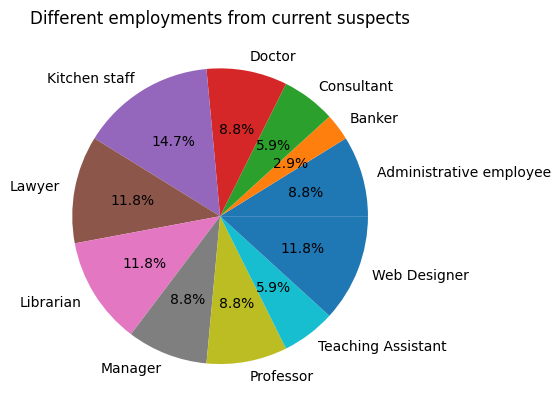

In [143]:
new_data.groupby(['employment']).size().plot(kind='pie', autopct='%1.1f%%')
plt.title("Different employments from current suspects")

plt.show()

## Journey length

Suisse Impossible Mission Force believes the rogue agent is an outlier from his declared category based on the days spent there compared to others.

We can use boxplots to identify outliers per employment category.

Let's first make two tables, one with the date of arrival and one with the date of departure (you can reuse your previous dataset for the date of arrival)

In [144]:
arrival_dates = new_data.rename(columns={'date': 'date_arrival'})

departure_dates = merged_data[(merged_data['date'] >= start_date) & (merged_data['date'] <= end_date) & (merged_data['departure'] == 'US')]
departure_dates = departure_dates.rename(columns={'date': 'date_dep'})

We can keep on both these tables the user ID, employment, and departure date / arrival date.

In [145]:
departure_dates = departure_dates[['userID', 'employment', 'date_dep']]
arrival_dates = arrival_dates[['userID', 'employment', 'date_arrival']]

We can now join the two tables on user ID

In [146]:
arr_dep_table = arrival_dates.merge(departure_dates, on='userID', how='inner')
arr_dep_table = arr_dep_table.drop(columns='employment_x')
arr_dep_table = arr_dep_table.rename(columns={'employment_y' : 'employment'})
arr_dep_table.head()

,userID,date_arrival,employment,date_dep
0,255830,2020-04-10,Professor,2020-10-07
1,710764,2019-09-17,Manager,2019-10-04
2,481578,2020-05-03,Administrative employee,2020-07-02
3,804662,2020-01-14,Consultant,2020-08-05
4,287607,2020-02-16,Kitchen staff,2020-06-30


We can now create a new feature called journey_length representing the arrival date - departure date

In [147]:
arr_dep_table['journey_length'] = (arr_dep_table['date_dep'] - arr_dep_table['date_arrival']).dt.days
arr_dep_table.head()

,userID,date_arrival,employment,date_dep,journey_length
0,255830,2020-04-10,Professor,2020-10-07,180
1,710764,2019-09-17,Manager,2019-10-04,17
2,481578,2020-05-03,Administrative employee,2020-07-02,60
3,804662,2020-01-14,Consultant,2020-08-05,204
4,287607,2020-02-16,Kitchen staff,2020-06-30,135


We can now create the boxplots

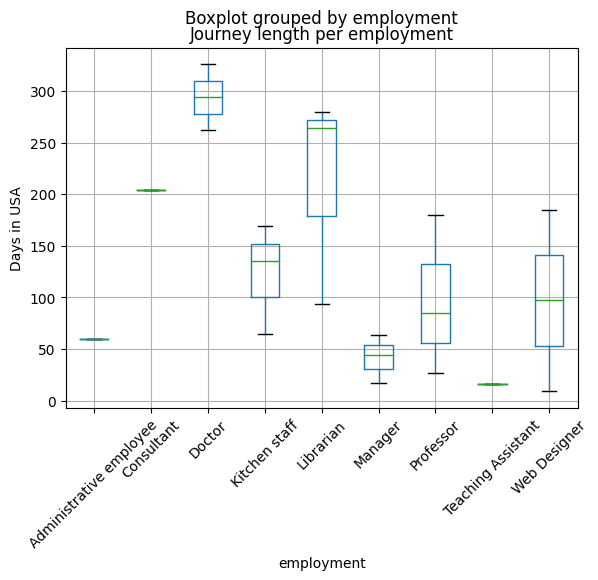

In [148]:
arr_dep_table['journey_length'] = arr_dep_table['journey_length']
arr_dep_table.boxplot(column='journey_length', by='employment')

plt.ylabel('Days in USA')
plt.title('Journey length per employment')
plt.xticks(rotation=45)

#tried this technique that i found on google to find any outliers but without any success. so put the code in comment
#Q1 = arr_dep_table['journey_length'].quantile(0.25)
#Q3 = arr_dep_table['journey_length'].quantile(0.75)
#IQR = Q3 - Q1
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

#outliers = arr_dep_table[(arr_dep_table['journey_length'] < lower_bound) | (arr_dep_table['journey_length'] > upper_bound)]
#plt.scatter(outliers.index, outliers['journey_length'], color='red', label='Outliers')

plt.show()

##SIMF is satisfied with your work but believes the current data is inconclusive.

Your investigation will continue when more intelligence comes in...